# <span style="font-family:Georgia; text-align:center;">Ciclo Heteroclínico</span> 

<span style="font-family:Georgia;">

Consideremos el sistema
$$
\dot r = r(1-r^2)\Big[r^2\sin^2\theta + \big(r^2\cos^2\theta-1\big)^2\Big], 
\qquad \\
\dot\theta = r^2\sin^2\theta + \big(r^2\cos^2\theta-1\big)^2.
$$
Para hacer el cambio de coordenadas polares a cartesianas usamos
$$
x=r\cos\theta,\qquad y=r\sin\theta,\qquad r^2=x^2+y^2.
$$
Observa que
$$
r^2\sin^2\theta=y^2,\qquad r^2\cos^2\theta=x^2,
$$
de modo que, definiendo
$$
A(x,y)\;:=\;y^2+\big(x^2-1\big)^2\;\;\ge 0,
$$
el sistema en polares se reescribe como
$$
\dot r = r(1-r^2)\,A(x,y),\qquad \dot\theta = A(x,y).
$$

Las identidades de cambio a cartesianas son
$$
\dot x = \dot r\cos\theta - r\sin\theta\,\dot\theta
       = \frac{\dot r}{r}\,x - \dot\theta\,y,
\qquad
\dot y = \dot r\sin\theta + r\cos\theta\,\dot\theta
       = \frac{\dot r}{r}\,y + \dot\theta\,x,
$$
válidas para $r>0$ (y extendibles por continuidad en $r=0$). Sustituyendo
$$
\frac{\dot r}{r}=(1-r^2)\,A(x,y),\qquad \dot\theta=A(x,y),\qquad r^2=x^2+y^2,
$$
obtenemos finalmente el sistema en coordenadas cartesianas:
$$
\boxed{
\begin{aligned}
\dot x &= A(x,y)\,\big[(1-(x^2+y^2))\,x - y\big],\\[2mm]
\dot y &= A(x,y)\,\big[(1-(x^2+y^2))\,y + x\big],
\end{aligned}}
\qquad
A(x,y)=y^2+\big(x^2-1\big)^2.
$$

In [1]:
# Sistema en polares:
#   r' = r(1 - r**2) * [ r**2 sin^2θ + (r**2 cos^2θ - 1)^2 ],
#   θ' = r**2 sin^2θ + (r**2 cos^2θ - 1)^2.
#
# Paso a cartesianas (x = r cosθ, y = r sinθ, r^2 = x^2 + y^2):
#   r^2 sin^2θ = y^2,   r^2 cos^2θ = x^2  ⇒  A(x,y) = y^2 + (x^2 - 1)^2.
#   (r'/r) = (1 - r^2) * A.
#   x' = (r'/r) x - θ' y = A[(1 - r^2)x - y],
#   y' = (r'/r) y + θ' x = A[(1 - r^2)y + x].
#   con r^2 = x^2 + y^2 y A = y^2 + (x^2 - 1)^2.
#
# Debajo: streamplot + trayectoria (RK4) con sliders para (x0,y0), T, límites y resolución.

# %pip install ipympl   # (solo si no tienes ipympl)

# backend interactivo 
%matplotlib widget    

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, IntSlider, VBox, HBox, interactive_output, Output
from IPython.display import display

plt.ioff()  # evita display implícito

# ----------------------
# Campo vectorial (cartesianas)
# ----------------------
def campo_xy(x, y):
    r2 = x*x + y*y
    A = y*y + (x*x - 1.0)**2
    fx = A * ((1.0 - r2)*x - y)
    fy = A * ((1.0 - r2)*y + x)
    return fx, fy

# ----------------------
# Integrador RK4 (autónomo 2D)
# ----------------------
def rk4(F, y0, t0, h, n):
    y = np.array(y0, dtype=float)
    traj = np.empty((n+1, 2), dtype=float)
    t = t0
    traj[0] = y
    for k in range(n):
        k1 = np.array(F(t, y))
        k2 = np.array(F(t + 0.5*h, y + 0.5*h*k1))
        k3 = np.array(F(t + 0.5*h, y + 0.5*h*k2))
        k4 = np.array(F(t + h, y + h*k3))
        y = y + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        t += h
        traj[k+1] = y
    return traj

def F_sistema(t, Y):
    x, y = Y
    fx, fy = campo_xy(x, y)
    return np.array([fx, fy])

# ----------------------
# Gráfico principal
# ----------------------
def graficar(x0=0.5, y0=0.2, T=20.0, lim=2.5, pasos=2500, densidad=1.2):
    # Campo para streamplot
    X = np.linspace(-lim, lim, 45)
    Y = np.linspace(-lim, lim, 45)
    XX, YY = np.meshgrid(X, Y)
    UU, VV = campo_xy(XX, YY)

    plt.figure(figsize=(7, 7))
    ax = plt.gca()
    ax.streamplot(XX, YY, UU, VV, density=densidad, arrowsize=1.0)
    ax.set_aspect("equal")
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid(True)
    ax.set_title(
        r"$x'=A[(1-r^2)x - y],\quad y'=A[(1-r^2)y + x],\ "
        r"A=y^2+(x^2-1)^2,\ r^2=x^2+y^2$"
        + f"\n CI=({x0:.2f},{y0:.2f}),  T={T:.2f}"
    )

    # Equilibrios destacados: (0,0) y (±1,0)
    ax.plot([0, 1, -1], [0, 0, 0], 'o', ms=6)

    # Trayectoria con RK4
    T = max(float(T), 0.0)
    pasos = max(int(pasos), 1)
    if T > 0:
        h = T / pasos
        tray = rk4(F_sistema, (x0, y0), 0.0, h, pasos)
        ax.plot(tray[:, 0], tray[:, 1], lw=2)
        ax.plot(tray[-1, 0], tray[-1, 1], "o", ms=6)  # punto final

    plt.show()

# ----------------------
# Sliders
# ----------------------
s_x0  = FloatSlider(value=0.1, min=-3.0, max=3.0, step=0.05, description='x0', continuous_update=False)
s_y0  = FloatSlider(value=0.1, min=-3.0, max=3.0, step=0.05, description='y0', continuous_update=False)
s_T   = FloatSlider(value=20.0, min=0.0, max=2200.0, step=1.0, description='T',  continuous_update=False)
s_lim = FloatSlider(value=1.5, min=1.5, max=6.0, step=0.5, description='lim', continuous_update=False)
s_pas = IntSlider(  value=2500, min=200, max=10000, step=100, description='pasos', continuous_update=False)
s_den = FloatSlider(value=1.2, min=0.5, max=2.0, step=0.1, description='dens', continuous_update=False)

out = interactive_output(
    graficar,
    {'x0': s_x0, 'y0': s_y0, 'T': s_T, 'lim': s_lim, 'pasos': s_pas, 'densidad': s_den}
)

# Render inicial dentro del mismo Output (para ver algo antes de mover sliders)
#with out:
#    graficar(s_x0.value, s_y0.value, s_T.value, s_lim.value, s_pas.value, s_den.value)

ui = HBox([
    VBox([s_x0, s_y0, s_T,s_lim, s_pas, s_den]),
    out
])

display(ui)


## <span style="font-family:Georgia; text-align:center;">Ejercicio</span> 
<span style="font-family:Georgia;">

- Usa la función `rk4` para aproximar una trayectoria del sistema.
- Grafica la componente en $x$ como función del tiempo de una solución numérica al sistema con condiciones iniciales 
$r(0)= 0.1 $, $\theta(0) = \frac {π}{4} $, con el eje horizontal en escala logarítmica, hasta al menos t = 1000.
- Explica el comportamiento de la gráfica.

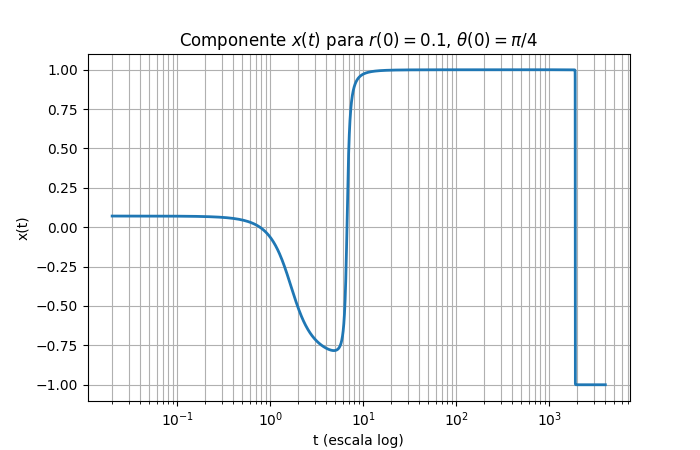

In [2]:
# Sistema en polares:
#   r' = r(1 - r**2) * [ r**2 sin^2(theta) + (r**2 cos^2(theta) - 1)**2 ]
#   theta' = r**2 sin^2(theta) + (r**2 cos^2(theta) - 1)**2
#
# Tarea:
# - Aproximar una trayectoria con RK4 desde r(0)=1e-9, theta(0)=pi/4.
# - Graficar x(t) = r(t) cos(theta(t)) vs. t con eje horizontal en escala logarítmica,
#   hasta al menos t = 1000.

import numpy as np
import matplotlib.pyplot as plt

def rk4(F, y0, t0, h, n):
    """
    Integrador de Runge-Kutta de orden 4 para sistemas autónomos y(t).
    F(t, y) debe devolver un array con las derivadas.
    """
    y = np.array(y0, dtype=float)
    Y = np.empty((n+1, len(y0)), dtype=float)
    T = np.empty(n+1, dtype=float)
    Y[0] = y
    T[0] = t0
    t = t0
    for k in range(n):
        k1 = np.array(F(t, y))
        k2 = np.array(F(t + 0.5*h, y + 0.5*h*k1))
        k3 = np.array(F(t + 0.5*h, y + 0.5*h*k2))
        k4 = np.array(F(t + h,     y + h*k3))
        y  = y + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        t  = t + h
        Y[k+1] = y
        T[k+1] = t
    return T, Y

def sistema_polares(t, Y):
    """
    Y = [r, theta]
    """
    r, th = Y
    r2 = r*r
    s, c = np.sin(th), np.cos(th)
    A = r2*(s*s) + (r2*(c*c) - 1.0)**2
    dr = r*(1.0 - r2)*A
    dth = A
    return np.array([dr, dth])

# Condiciones iniciales
r0    = 0.1#1e-9
theta0 = np.pi/4
y0 = np.array([r0, theta0])

# Parámetros de integración
Tfin = 4000.0      # tiempo final
h    = 0.02        # paso 
N    = int(Tfin/h)

# Integración RK4 en polares
t, tray = rk4(sistema_polares, y0, 0.0, h, N)
r = tray[:, 0]
theta = tray[:, 1]

# Componente x(t)
x = r * np.cos(theta)

# Gráfica: x(t) vs t con eje horizontal logarítmico.
plt.figure(figsize=(7,4.5))
# evitamos t=0 en escala log (descartamos el primer punto t=0)
plt.plot(t[1:], x[1:], lw=2)
plt.xscale('log')
plt.xlabel('t (escala log)')
plt.ylabel('x(t)')
plt.title('Componente $x(t)$ para $r(0)=0.1$, $\\theta(0)=\\pi/4$')
plt.grid(True, which='both')
plt.show()
